In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Age = df.Age.fillna(df.Age.mean())

In [8]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode())

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_sex = pd.get_dummies(df['Sex'])
df_embarked = pd.get_dummies(df['Embarked'])

In [11]:
df_new = pd.concat([df, df_sex,df_embarked], axis=1)

In [12]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [13]:
df_new = df_new.drop(columns = ["Sex"])
df_new = df_new.drop(columns = ["Embarked"])

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [15]:
Y = df_new["Survived"]
X = df_new[["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S", 'PassengerId']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [17]:
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
train_accuracy = log_reg.score(X_train, Y_train)
test_accuracy = log_reg.score(X_test, Y_test)
print('One-vs-rest', '-'*20, 
      'Model accuracy on train data : {:.2f}'.format(train_accuracy), 
      'Model accuracy on test data   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
--------------------
Model accuracy on train data : 0.79
Model accuracy on test data   : 0.78


In [19]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, Y_train)
train_accuracy = log_reg_mnm.score(X_train, Y_train)
test_accuracy = log_reg_mnm.score(X_test, Y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Model accuracy on train data : {:.2f}'.format(train_accuracy), 
      'Model accuracy on test data   : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Model accuracy on train data : 0.80
Model accuracy on test data   : 0.79


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
predictions = log_reg.predict(X_test)

In [21]:
survive = {'PassengerId': X_test.PassengerId, 'Survive': predictions}

In [22]:
table = pd.DataFrame(survive)
table

,PassengerId,Survive
374,375,1
211,212,1
258,259,1
584,585,0
461,462,0
...,...,...
739,740,0
323,324,1
395,396,0
386,387,0


In [23]:
predictions_test = log_reg.predict(X_test)
predictions_train = log_reg.predict(X_train)

In [25]:
from sklearn.metrics import confusion_matrix
con_mat_train = confusion_matrix(Y_train, predictions_train)
con_mat_test = confusion_matrix(Y_test, predictions)

print('Confusion Matrix Train:', '--'*15,'\n', con_mat_train ,'\n'*2)
print('Confusion Matrix Test:', '--'*15,'\n', con_mat_test)

Confusion Matrix Train: ------------------------------ 
 [[376  60]
 [ 91 185]] 


Confusion Matrix Test: ------------------------------ 
 [[96 17]
 [22 44]]


In [26]:
TN = con_mat_test[0][0]
TP = con_mat_test[1][1]
FP = con_mat_test[0][1]
FN = con_mat_test[1][0]

print("True Negative   :", TN)
print("True Positive   :", TP)
print("False Positive  :", FP)
print("False Negative  :", FN)

True Negative   : 96
True Positive   : 44
False Positive  : 17
False Negative  : 22


In [29]:
from sklearn.metrics import accuracy_score

print("Model Accuracy           : ",  log_reg.score(X_test, Y_test))
print("Calculated Accuracy      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score()         : ",  accuracy_score(Y_test, predictions))

Model Accuracy           :  0.7821229050279329
Calculated Accuracy      :  0.7821229050279329
accuracy_score()         :  0.7821229050279329


In [30]:
print('Error Rate:', 1-accuracy_score(Y_test, predictions))

Error Rate: 0.2178770949720671


In [31]:
from sklearn.metrics import precision_score

print("Calculated Precision      : ",  (TP)/(FP + TP))
print("precision_score()         : ",  precision_score(Y_test, predictions))

Calculated Precision      :  0.7213114754098361
precision_score()         :  0.7213114754098361


In [32]:
from sklearn.metrics import recall_score

print("Calculated Recall Score .    : ",  (TP)/(TP + FN))
print("recall_score()               : ",  recall_score(Y_test, predictions))

Calculated Recall Score .    :  0.6666666666666666
recall_score()               :  0.6666666666666666


In [33]:
print('Specifity:', TN/(TN + FP))

Specifity: 0.8495575221238938


In [34]:
from sklearn.metrics import f1_score

precision_scor = precision_score(Y_test, predictions)
recall_scor = recall_score(Y_test, predictions)


print("calculated f1 score   : ",  2*((precision_scor*recall_scor)/(precision_scor + recall_scor)))
print("f1_score()            : ",  f1_score(Y_test, predictions))

calculated f1 score   :  0.6929133858267716
f1_score()            :  0.6929133858267716


In [35]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test, predictions) )

print("f1_score()               : {:.2f}".format(f1_score(Y_test, predictions)))
print("recall_score()           : {:.2f}".format(recall_score(Y_test, predictions)))
print("precision_score()        : {:.2f}".format(precision_score(Y_test, predictions)))
print('\n')

metrics =  precision_recall_fscore_support(Y_test, predictions)
print("Precision :" , metrics[0]) 
print("Recall    :" , metrics[1]) 
print("F1 Score  :" , metrics[2])

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       113
           1       0.72      0.67      0.69        66

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

f1_score()               : 0.69
recall_score()           : 0.67
precision_score()        : 0.72


Precision : [0.81355932 0.72131148]
Recall    : [0.84955752 0.66666667]
F1 Score  : [0.83116883 0.69291339]


In [36]:
predict_test = log_reg.predict_proba(X_test)[:,1]

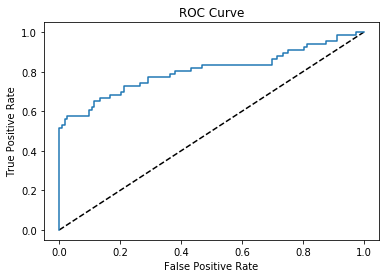

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(Y_test, predict_test)

import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
print('AUC  : ', roc_auc_score(Y_test, predictions))

AUC  :  0.7581120943952802


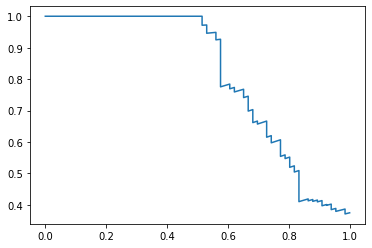

In [39]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, predict_test)

plt.plot(recall, precision)
plt.show()

In [40]:
from sklearn.metrics import log_loss

print("log-loss                    : " , log_loss(Y_test, predict_test))
print("Error Rate                  : " , 1- accuracy_score(Y_test, predictions))

log-loss                    :  0.4850764957481302
Error Rate                  :  0.2178770949720671
